In [1]:
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import os
import biotite.structure.io.xtc as xtc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output_folders = [x for x in os.listdir(".") if "output_" in x]
output_folders = output_folders[:-1]
output_folders

['output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA',
 'output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA']

In [3]:
pulling_files_per_folder = []
for folder in output_folders:
    pulling_files = [x for x in os.listdir(folder) if "pulling" in x and "#" not in x]
    pulling_files_per_folder.append(pulling_files)

pulling_files_per_folder[0]

['6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.log',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.trr',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.xtc',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered_fit.pdb',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullf.xvg',
 'pulling_sb431542.pdb',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered.xtc',
 '4-npt-pulling.mdp',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.tpr',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.edr',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullx.xvg',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_step3525.cpt',
 'plot_pulling_over_time',
 '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.cpt',
 'plot_pulling_over_distance',
 '6

In [4]:
pulling_xtcs = []
for files in pulling_files_per_folder:
    xtcs = [x for x in files if ".xtc" in x]
    pulling_xtcs.append(xtcs)

pulling_xtcs

[['6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling.xtc',
  '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered.xtc',
  '6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc'],
 ['6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc',
  '6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_clustered.xtc',
  '6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling.xtc']]

In [5]:
conf0_sb431542 = strucio.load_structure('output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA/pulling_sb431542.pdb', model=1)
conf0_bacteriochlorin = strucio.load_structure('output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA/pulling_bacteriochlorin.pdb', model=1)

In [6]:
protein_mask = struc.filter_amino_acids(conf0_sb431542)
conf0_sb431542 = conf0_sb431542[protein_mask]
folder = "output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA"
traj_file_path = folder + "/6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc"
xtc_file_sb431542 = xtc.XTCFile.read(traj_file_path, atom_i=np.where(protein_mask)[0])
trajectory_sb431542 = xtc_file_sb431542.get_structure(conf0_sb431542)
time_sb431542 = xtc_file_sb431542.get_time()

In [7]:
protein_mask = struc.filter_amino_acids(conf0_bacteriochlorin)
conf0_bacteriochlorin = conf0_bacteriochlorin[protein_mask]
folder = "output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA"
traj_file_path_bacteriochlorin = folder + "/6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc"
xtc_file_bacteriochlorin = xtc.XTCFile.read(traj_file_path_bacteriochlorin, atom_i=np.where(protein_mask)[0])
trajectory_bacteriochlorin = xtc_file_bacteriochlorin.get_structure(conf0_bacteriochlorin)
time_bacteriochlorin = xtc_file_bacteriochlorin.get_time()

In [8]:
traj_protein_sb431542 = trajectory_sb431542[:, trajectory_sb431542.chain_id != "C"]
traj_ligand_sb431542 = trajectory_sb431542[:, trajectory_sb431542.chain_id == "C"]
traj_protein_bacteriochlorin = trajectory_bacteriochlorin[:,trajectory_bacteriochlorin.chain_id != "C"]
traj_ligand_bacteriochlorin = trajectory_bacteriochlorin[:,trajectory_bacteriochlorin.chain_id == "C"]

In [9]:
com_prot_sb431542 = struc.mass_center(traj_protein_sb431542)
com_lig_sb431542 = struc.mass_center(traj_ligand_sb431542)
com_prot_bact = struc.mass_center(traj_protein_bacteriochlorin)
com_lig_bact = struc.mass_center(traj_ligand_bacteriochlorin)

In [10]:
dR_lig_prot_sb431542 = np.linalg.norm(com_prot_sb431542 - com_lig_sb431542, axis=1)
dR_lig_prot_bact = np.linalg.norm(com_prot_bact - com_lig_bact, axis=1)

In [23]:
#ind_1nm = np.argmin(np.power(dR_lig_prot_sb431542 - dR_lig_prot_sb431542[0]- 10, 2.0))
def funct(dR, r):
    return np.power(dR - dR[0] - r, 2.0)

inds_sb431542= np.unique([np.argmin(funct(dR_lig_prot_sb431542, r)) for r in np.linspace(0, 80, 20)])
inds_bact= np.unique([np.argmin(funct(dR_lig_prot_bact, r)) for r in np.linspace(0, 80, 20)])

In [24]:
inds_bact

array([  0,  82, 129, 158, 197, 232, 287, 318, 359, 400, 443, 493, 533,
       568, 620, 657, 660])

In [25]:
dR_lig_prot_bact[inds_bact]*0.1

array([1.53677619, 1.96237754, 2.38356257, 2.80248708, 3.21913432,
       3.64172555, 4.06517636, 4.48337102, 4.90404244, 5.3252148 ,
       5.74404059, 6.17254647, 6.58652748, 7.01513171, 7.43403281,
       7.85409295, 7.88504395])

In [26]:
np.linspace(0, 80, 40)*0.1

array([0.        , 0.20512821, 0.41025641, 0.61538462, 0.82051282,
       1.02564103, 1.23076923, 1.43589744, 1.64102564, 1.84615385,
       2.05128205, 2.25641026, 2.46153846, 2.66666667, 2.87179487,
       3.07692308, 3.28205128, 3.48717949, 3.69230769, 3.8974359 ,
       4.1025641 , 4.30769231, 4.51282051, 4.71794872, 4.92307692,
       5.12820513, 5.33333333, 5.53846154, 5.74358974, 5.94871795,
       6.15384615, 6.35897436, 6.56410256, 6.76923077, 6.97435897,
       7.17948718, 7.38461538, 7.58974359, 7.79487179, 8.        ])

In [27]:
inds_sb431542

array([  0, 100, 132, 158, 187, 234, 274, 313, 351, 401, 445, 489, 527,
       573, 611, 663, 676])

Text(0, 0.5, '$R_{pull}$ [nm]')

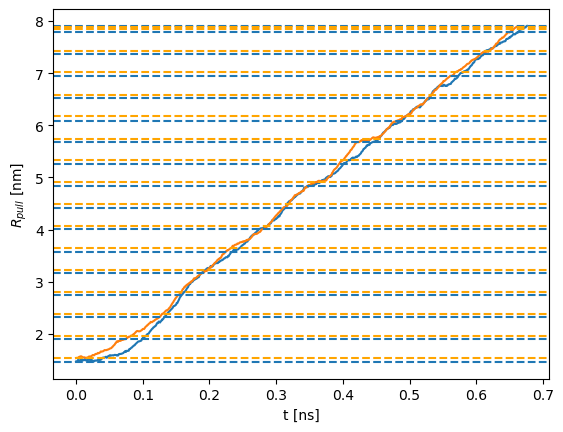

In [30]:
plt.plot(time_sb431542*0.001, dR_lig_prot_sb431542*0.1)
plt.plot(time_bacteriochlorin*0.001, dR_lig_prot_bact*0.1)
#plt.axhline(dR_lig_prot_sb431542[ind_1nm]*0.1, ls="--")
for ind in inds_sb431542:
    plt.axhline(dR_lig_prot_sb431542[ind]*0.1, ls="--")

for ind in inds_bact:
    plt.axhline(dR_lig_prot_bact[ind]*0.1, ls="--", color="orange")

plt.xlabel("t [ns]")
plt.ylabel("$R_{pull}$ [nm]")

In [34]:
batch_job_umbrella_sb431542 = None
with open("job_ligand_sb431542_umbrella") as f_job:
    batch_job_umbrella_sb431542 = f_job.read()

batch_job_umbrella_bact = None
with open("job_ligand_bacteriochlorin_umbrella") as f_job:
    batch_job_umbrella_bact = f_job.read()

In [36]:
for i, ind in enumerate(inds_sb431542):
    if i > 0:
        job_to_write = batch_job_umbrella_sb431542.replace("__CONF__", str(ind))
        job_name = "job_ligand_sb431542_umbrella_{0}".format(i)
        print("writing job '{0}'".format(job_name))
        with open(job_name, "w") as f_job_out:
            f_job_out.write(job_to_write)

print("to run all jobs do :: ")
print("$ for i in {1..19}; do sbatch job_ligand_sb431542_umbrella_${i}; done\n\n")

writing job 'job_ligand_sb431542_umbrella_1'
writing job 'job_ligand_sb431542_umbrella_2'
writing job 'job_ligand_sb431542_umbrella_3'
writing job 'job_ligand_sb431542_umbrella_4'
writing job 'job_ligand_sb431542_umbrella_5'
writing job 'job_ligand_sb431542_umbrella_6'
writing job 'job_ligand_sb431542_umbrella_7'
writing job 'job_ligand_sb431542_umbrella_8'
writing job 'job_ligand_sb431542_umbrella_9'
writing job 'job_ligand_sb431542_umbrella_10'
writing job 'job_ligand_sb431542_umbrella_11'
writing job 'job_ligand_sb431542_umbrella_12'
writing job 'job_ligand_sb431542_umbrella_13'
writing job 'job_ligand_sb431542_umbrella_14'
writing job 'job_ligand_sb431542_umbrella_15'
writing job 'job_ligand_sb431542_umbrella_16'
to run all jobs do :: 
$ for i in {1..19}; do sbatch job_ligand_sb431542_umbrella_${i}; done




In [14]:
for i, ind in enumerate(inds_bact):
    if i > 0:
        job_to_write = batch_job_umbrella_bact.replace("__CONF__", str(ind))
        job_name = "job_ligand_bacteriochlorin_umbrella_{0}".format(i)
        print("writing job '{0} [conf_{1}]".format(job_name, ind))        
        #with open(job_name, "w") as f_job_out:
        #    f_job_out.write(job_to_write)

print("to run all jobs do :: ")
print("$ for i in {1..19}; do sbatch job_ligand_bacteriochlorin_umbrella_${i}; done\n\n")

writing job 'job_ligand_bacteriochlorin_umbrella_1 [conf_54]
writing job 'job_ligand_bacteriochlorin_umbrella_2 [conf_81]
writing job 'job_ligand_bacteriochlorin_umbrella_3 [conf_106]
writing job 'job_ligand_bacteriochlorin_umbrella_4 [conf_128]
writing job 'job_ligand_bacteriochlorin_umbrella_5 [conf_143]
writing job 'job_ligand_bacteriochlorin_umbrella_6 [conf_156]
writing job 'job_ligand_bacteriochlorin_umbrella_7 [conf_170]
writing job 'job_ligand_bacteriochlorin_umbrella_8 [conf_192]
writing job 'job_ligand_bacteriochlorin_umbrella_9 [conf_210]
writing job 'job_ligand_bacteriochlorin_umbrella_10 [conf_225]
writing job 'job_ligand_bacteriochlorin_umbrella_11 [conf_255]
writing job 'job_ligand_bacteriochlorin_umbrella_12 [conf_278]
writing job 'job_ligand_bacteriochlorin_umbrella_13 [conf_296]
writing job 'job_ligand_bacteriochlorin_umbrella_14 [conf_310]
writing job 'job_ligand_bacteriochlorin_umbrella_15 [conf_326]
writing job 'job_ligand_bacteriochlorin_umbrella_16 [conf_345]
wri

In [94]:
print(batch_job_umbrella_bact[:400])

#!/bin/bash
# 
#
#SBATCH -e slurm-%j.e
#SBATCH -o slurm-%j.o
#
#### GPU BATCH JOB
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=4
#SBATCH --partition=batch_gpu.q
#SBATCH --ntasks=4
#SBATCH --gres=gpu:v100:1
#
#
#### CPU BATCH JOB
##SBATCH --ntasks=128
##SBATCH --nodes=1
##SBATCH --ntasks-per-node=128
##SBATCH --partition=batch_csa_resvervation.q
#
#
##SBATCH -t 24:00:00
##SBATCH --dependency=afterok


In [113]:
(6*60+14-(60+45))/60*38/4/24

1.7746527777777779